In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import warnings

# Ignoring warnings
warnings.filterwarnings("ignore")

In [56]:
os.listdir(r"C:\Users\pc\Desktop\DataSets\WasteWaterManagement\DataSet")

['Source.csv', 'Treatment Plant.csv', 'WasteWaterTreatmentFact.csv']

In [57]:
# Reading the Source Data File 
Sources_df=pd.read_csv(r"C:\Users\pc\Desktop\DataSets\WasteWaterManagement\DataSet\Source.csv")

In [58]:
# Reading the Treatment Plant data file
TrtPlant_df=pd.read_csv(r"C:\Users\pc\Desktop\DataSets\WasteWaterManagement\DataSet\Treatment Plant.csv")

In [59]:
# Reading the Waste Water Treatment Fact file 
WstWtrtrt_df=pd.read_csv(r"C:\Users\pc\Desktop\DataSets\WasteWaterManagement\DataSet\WasteWaterTreatmentFact.csv")

In [60]:
Sources_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SourceID         4 non-null      int64 
 1   Source Name      4 non-null      object
 2   Industry Sector  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


In [61]:
TrtPlant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PlantID   10 non-null     int64 
 1   name      10 non-null     object
 2   Location  10 non-null     object
 3   Capacity  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [62]:
WstWtrtrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SampleID                 1050 non-null   int64 
 1   PlantID                  1050 non-null   int64 
 2   SourceID                 1050 non-null   int64 
 3   Date                     1050 non-null   object
 4   Volume of Water Treated  1050 non-null   int64 
 5   Result                   1050 non-null   object
dtypes: int64(4), object(2)
memory usage: 49.3+ KB


In [63]:
Sources_df.isnull().sum()

SourceID           0
Source Name        0
Industry Sector    0
dtype: int64

In [64]:
TrtPlant_df.isnull().sum()

PlantID     0
name        0
Location    0
Capacity    0
dtype: int64

In [65]:
Sources_df.duplicated()

0    False
1    False
2    False
3    False
dtype: bool

In [66]:
TrtPlant_df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [67]:
WstWtrtrt_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1045    False
1046    False
1047    False
1048    False
1049    False
Length: 1050, dtype: bool

In [68]:
WstWtrtrt_df['Date']=pd.to_datetime(WstWtrtrt_df["Date"])

In [69]:
WstWtrtrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   SampleID                 1050 non-null   int64         
 1   PlantID                  1050 non-null   int64         
 2   SourceID                 1050 non-null   int64         
 3   Date                     1050 non-null   datetime64[ns]
 4   Volume of Water Treated  1050 non-null   int64         
 5   Result                   1050 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 49.3+ KB


In [70]:
WstWtrtrt_df['Weekday']=WstWtrtrt_df['Date'].dt.day_name()

In [71]:
WstWtrtrt_df['Weekday']

0       Monday
1       Monday
2       Monday
3       Monday
4       Monday
         ...  
1045    Sunday
1046    Sunday
1047    Sunday
1048    Sunday
1049    Sunday
Name: Weekday, Length: 1050, dtype: object

In [72]:
WstWtrtrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   SampleID                 1050 non-null   int64         
 1   PlantID                  1050 non-null   int64         
 2   SourceID                 1050 non-null   int64         
 3   Date                     1050 non-null   datetime64[ns]
 4   Volume of Water Treated  1050 non-null   int64         
 5   Result                   1050 non-null   object        
 6   Weekday                  1050 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 57.6+ KB


In [73]:
TrtPlant_df

,PlantID,name,Location,Capacity
0,1,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day
1,2,Oakland Treatment Plant,"Oakland, CA",50 million gallons per day
2,3,Sacramento Treatment Plant,"Sacramento, CA",25 million gallons per day
3,4,Los Angeles Treatment Plant,"Los Angeles, CA",150 million gallons per day
4,5,San Diego Treatment Plant,"San Diego, CA",100 million gallons per day
5,6,Phoenix Treatment Plant,"Phoenix, AZ",75 million gallons per day
6,7,Denver Treatment Plant,"Denver, CO",50 million gallons per day
7,8,Minneapolis Treatment Plant,"Minneapolis, MN",25 million gallons per day
8,9,Chicago Treatment Plant,"Chicago, IL",150 million gallons per day
9,10,New York Treatment Plant,"New York, NY",100 million gallons per day


In [74]:
TrtPlant_df['Capacity_new']=TrtPlant_df['Capacity'].str.split(' ').str.get(0).astype('int')

# Data Modelling
Establishing new relationship between Sources_df and WstWtrtrt_df

In [75]:
Sources_df

,SourceID,Source Name,Industry Sector
0,1,Residential,-
1,2,Industrial,Manufacturing
2,3,Healthcare,Medical
3,4,Other,Miscellaneous


In [76]:
WstWtrtrt_df

,SampleID,PlantID,SourceID,Date,Volume of Water Treated,Result,Weekday
0,1,1,1,2022-01-03,33,Pass,Monday
1,2,1,2,2022-01-03,27,Fail,Monday
2,3,1,3,2022-01-03,28,Pass,Monday
3,4,2,1,2022-01-03,16,Pass,Monday
4,5,2,2,2022-01-03,16,Pass,Monday
...,...,...,...,...,...,...,...
1045,1046,9,2,2022-02-06,44,Pass,Sunday
1046,1047,9,3,2022-02-06,42,Pass,Sunday
1047,1048,10,1,2022-02-06,29,Pass,Sunday
1048,1049,10,2,2022-02-06,29,Pass,Sunday


# Establishing new relationship between Sources_df and WstWtrtrt_df

In [77]:

WstWtrtrt_Sources_df=pd.merge(WstWtrtrt_df,Sources_df,on='SourceID',how='left')

In [78]:
WstWtrtrt_Sources_df

,SampleID,PlantID,SourceID,Date,Volume of Water Treated,Result,Weekday,Source Name,Industry Sector
0,1,1,1,2022-01-03,33,Pass,Monday,Residential,-
1,2,1,2,2022-01-03,27,Fail,Monday,Industrial,Manufacturing
2,3,1,3,2022-01-03,28,Pass,Monday,Healthcare,Medical
3,4,2,1,2022-01-03,16,Pass,Monday,Residential,-
4,5,2,2,2022-01-03,16,Pass,Monday,Industrial,Manufacturing
...,...,...,...,...,...,...,...,...,...
1045,1046,9,2,2022-02-06,44,Pass,Sunday,Industrial,Manufacturing
1046,1047,9,3,2022-02-06,42,Pass,Sunday,Healthcare,Medical
1047,1048,10,1,2022-02-06,29,Pass,Sunday,Residential,-
1048,1049,10,2,2022-02-06,29,Pass,Sunday,Industrial,Manufacturing


In [79]:
TrtPlant_df

,PlantID,name,Location,Capacity,Capacity_new
0,1,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day,100
1,2,Oakland Treatment Plant,"Oakland, CA",50 million gallons per day,50
2,3,Sacramento Treatment Plant,"Sacramento, CA",25 million gallons per day,25
3,4,Los Angeles Treatment Plant,"Los Angeles, CA",150 million gallons per day,150
4,5,San Diego Treatment Plant,"San Diego, CA",100 million gallons per day,100
5,6,Phoenix Treatment Plant,"Phoenix, AZ",75 million gallons per day,75
6,7,Denver Treatment Plant,"Denver, CO",50 million gallons per day,50
7,8,Minneapolis Treatment Plant,"Minneapolis, MN",25 million gallons per day,25
8,9,Chicago Treatment Plant,"Chicago, IL",150 million gallons per day,150
9,10,New York Treatment Plant,"New York, NY",100 million gallons per day,100


In [80]:
# Establishing new relationship between TrtPlant_df and WstWtrtrt_df
WstWtrtrt_TrtPlant_df=pd.merge(WstWtrtrt_df,TrtPlant_df,on='PlantID',how='left')

In [81]:
WstWtrtrt_TrtPlant_df

,SampleID,PlantID,SourceID,Date,Volume of Water Treated,Result,Weekday,name,Location,Capacity,Capacity_new
0,1,1,1,2022-01-03,33,Pass,Monday,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day,100
1,2,1,2,2022-01-03,27,Fail,Monday,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day,100
2,3,1,3,2022-01-03,28,Pass,Monday,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day,100
3,4,2,1,2022-01-03,16,Pass,Monday,Oakland Treatment Plant,"Oakland, CA",50 million gallons per day,50
4,5,2,2,2022-01-03,16,Pass,Monday,Oakland Treatment Plant,"Oakland, CA",50 million gallons per day,50
...,...,...,...,...,...,...,...,...,...,...,...
1045,1046,9,2,2022-02-06,44,Pass,Sunday,Chicago Treatment Plant,"Chicago, IL",150 million gallons per day,150
1046,1047,9,3,2022-02-06,42,Pass,Sunday,Chicago Treatment Plant,"Chicago, IL",150 million gallons per day,150
1047,1048,10,1,2022-02-06,29,Pass,Sunday,New York Treatment Plant,"New York, NY",100 million gallons per day,100
1048,1049,10,2,2022-02-06,29,Pass,Sunday,New York Treatment Plant,"New York, NY",100 million gallons per day,100


# Data Visulization and Analysis

In [82]:
WstWtrtrt_TrtPlant_df_grouped=WstWtrtrt_TrtPlant_df.groupby('name',as_index=False)['Volume of Water Treated'].sum()

In [83]:
WstWtrtrt_TrtPlant_df_grouped

,name,Volume of Water Treated
0,Chicago Treatment Plant,4577
1,Denver Treatment Plant,1298
2,Los Angeles Treatment Plant,4983
3,Minneapolis Treatment Plant,677
4,New York Treatment Plant,3145
5,Oakland Treatment Plant,1518
6,Phoenix Treatment Plant,2377
7,Sacramento Treatment Plant,668
8,San Diego Treatment Plant,2810
9,San Francisco Treatment Plant,3133


# KPI 1 : Plant that is treating maximum & minimum volume of waste water

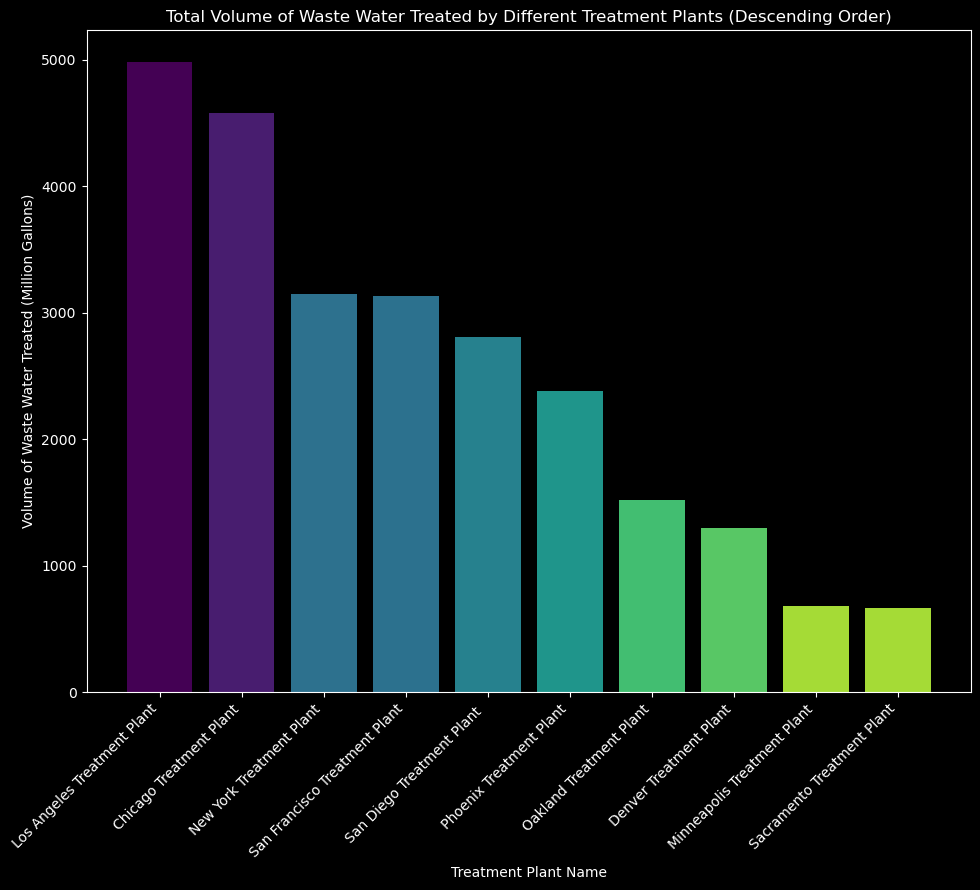

In [186]:
sorted_df = WstWtrtrt_TrtPlant_df_grouped.sort_values(by='Volume of Water Treated', ascending=False)

# Increase figure size
plt.figure(figsize=(10, 9))

plt.style.use('dark_background')

plt.bar(
    sorted_df['name'],
    sorted_df['Volume of Water Treated'],
    color=bar_colors,
    tick_label=sorted_df['name']
)

plt.xlabel('Treatment Plant Name')
plt.ylabel('Volume of Waste Water Treated (Million Gallons)')
plt.title('Total Volume of Waste Water Treated by Different Treatment Plants (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

# KPI 2 : % Contribution of waste water from different Sources

In [85]:
# KPI 2 : % Contribution of waste water from different Sources
WstWtrtrt_Sources_grouped_df=WstWtrtrt_Sources_df.groupby("Source Name",as_index=False)["Volume of Water Treated"].sum()

In [86]:
WstWtrtrt_Sources_grouped_df

,Source Name,Volume of Water Treated
0,Healthcare,8403
1,Industrial,8408
2,Residential,8375


# Plotting Contribution of Waste Water from Different Sources data using Pie / Donut Chart

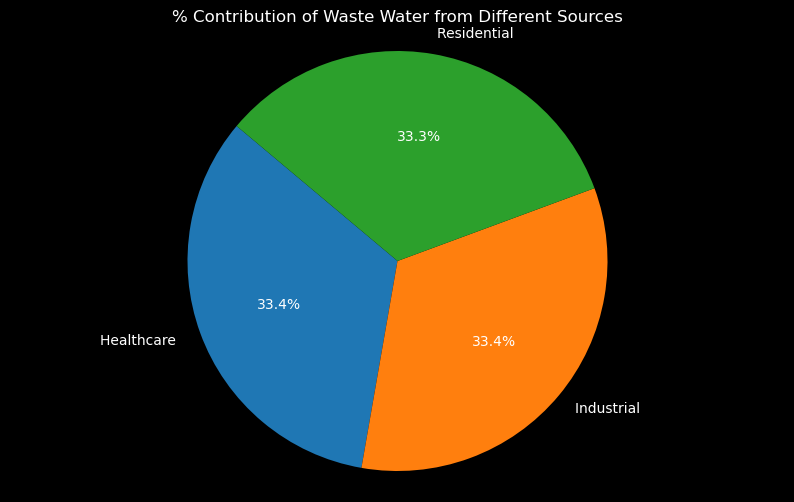

In [179]:
# Sort the DataFrame in descending order based on 'Volume of Water Treated'
sorted_df = WstWtrtrt_TrtPlant_df_grouped.sort_values(by='Volume of Water Treated', ascending=False)

# Increase figure size
plt.figure(figsize=(10, 6))

plt.style.use('dark_background')


labels = WstWtrtrt_Sources_grouped_df['Source Name']
sizes = WstWtrtrt_Sources_grouped_df['Volume of Water Treated']

# Define custom colors for the pie chart segments
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


plt.pie(sizes, labels=labels, colors=custom_colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.title('% Contribution of Waste Water from Different Sources')
plt.show()

# KPI 3 : Identify Highly utilized Treatment Plant

In [167]:
# Summation on Volume of Waste Water on the basis of Plant name and Date
WstWtrtrt_TrtPlant_grp_vol_df=WstWtrtrt_TrtPlant_df.groupby(['name','Date'],as_index=False)['Volume of Water Treated'].sum().sort_values(by=['name','Date'])

In [170]:
WstWtrtrt_TrtPlant_grp_vol_df

,name,Date,Volume of Water Treated
0,Chicago Treatment Plant,2022-01-03,136
1,Chicago Treatment Plant,2022-01-04,134
2,Chicago Treatment Plant,2022-01-05,129
3,Chicago Treatment Plant,2022-01-06,128
4,Chicago Treatment Plant,2022-01-07,128
...,...,...,...
345,San Francisco Treatment Plant,2022-02-02,92
346,San Francisco Treatment Plant,2022-02-03,96
347,San Francisco Treatment Plant,2022-02-04,91
348,San Francisco Treatment Plant,2022-02-05,88


In [169]:
# Taking mean of capacity_new column on the basis of Plant name and Date
WstWtrtrt_TrtPlant_grp_cap_df=WstWtrtrt_TrtPlant_df.groupby(['name','Date'],as_index=False)['Capacity_new'].mean().sort_values(by=['name','Date'])

In [166]:
WstWtrtrt_TrtPlant_grp_cap_df

,name,Date,Capacity_new
0,Chicago Treatment Plant,2022-01-03,150.0
1,Chicago Treatment Plant,2022-01-04,150.0
2,Chicago Treatment Plant,2022-01-05,150.0
3,Chicago Treatment Plant,2022-01-06,150.0
4,Chicago Treatment Plant,2022-01-07,150.0
...,...,...,...
345,San Francisco Treatment Plant,2022-02-02,100.0
346,San Francisco Treatment Plant,2022-02-03,100.0
347,San Francisco Treatment Plant,2022-02-04,100.0
348,San Francisco Treatment Plant,2022-02-05,100.0


In [93]:
# Identifying Utilization of Treatment Plants on Daily basis 
WstWtrtrt_TrtPlant_grp_cap_df['utilization']=WstWtrtrt_TrtPlant_grp_vol_df['Volume of Water Treated']/WstWtrtrt_TrtPlant_grp_cap_df['Capacity_new']*100

In [94]:
# Rounding data to 2 places
WstWtrtrt_TrtPlant_grp_cap_df['utilization']=WstWtrtrt_TrtPlant_grp_cap_df['utilization'].round(2)

In [95]:
# Identifying average utilization of treatment plant
Avg_Utilization=WstWtrtrt_TrtPlant_grp_cap_df.groupby('name',as_index=False)['utilization'].mean().round(2)

# Plotting Utilization of Different Treatment Plants  

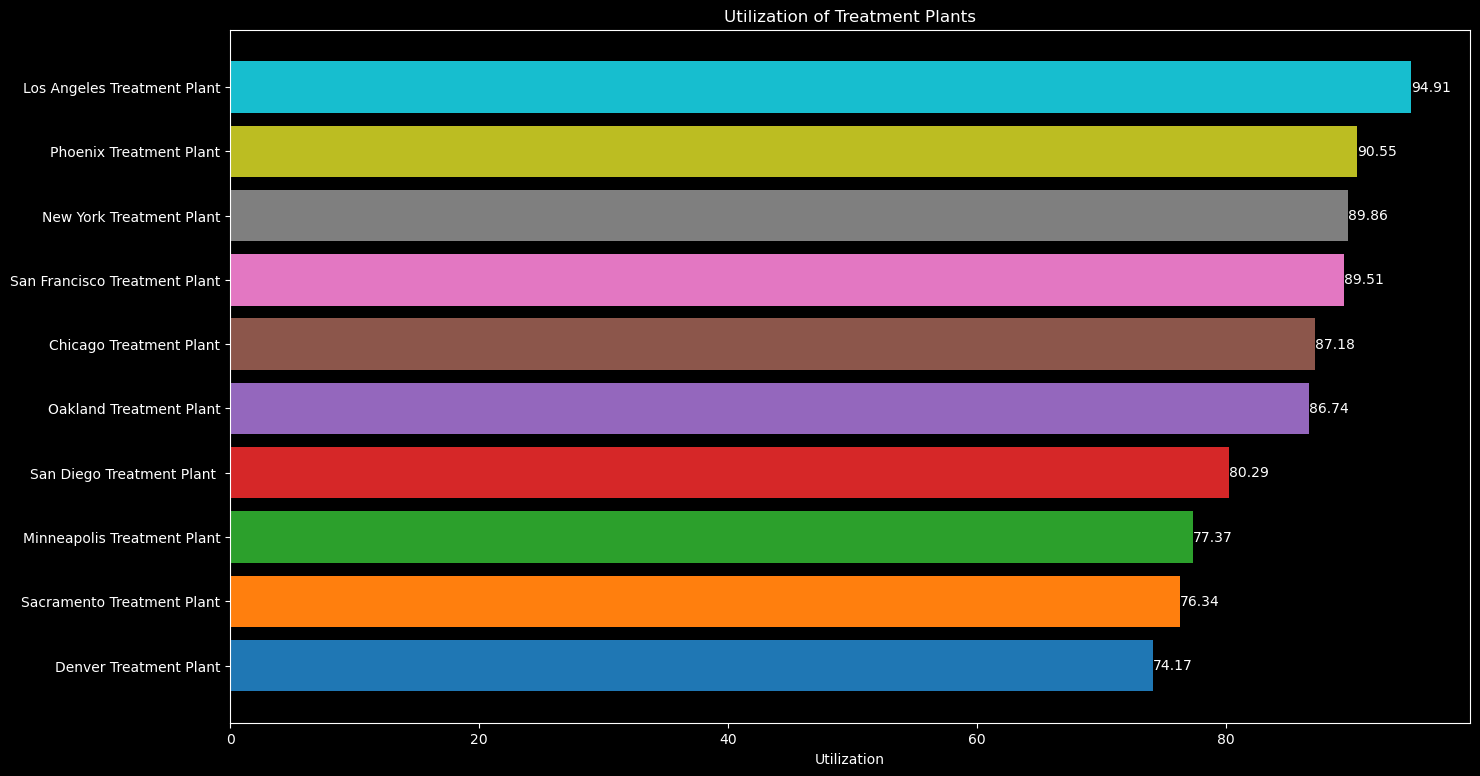

In [135]:

plt.style.use('dark_background')

sorted_data = Avg_Utilization.sort_values(by='utilization', ascending=True)

fig, ax = plt.subplots(figsize=(16,9))

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

bars = plt.barh(sorted_data['name'], sorted_data['utilization'], color=custom_colors)
plt.xlabel('Utilization')
plt.title('Utilization of Treatment Plants')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', ha='left', va='center', color='white')

#plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top
#plt.tight_layout()

plt.show()

# KPI 4 : Identifying Highly Efficient Treatment Plant

In [97]:
Successfully_Treated_df=WstWtrtrt_TrtPlant_df[WstWtrtrt_TrtPlant_df['Result']=='Pass'].groupby('name',as_index=False)['Volume of Water Treated'].sum()

In [98]:
Successfully_Treated_df


,name,Volume of Water Treated
0,Chicago Treatment Plant,4110
1,Denver Treatment Plant,1221
2,Los Angeles Treatment Plant,4366
3,Minneapolis Treatment Plant,585
4,New York Treatment Plant,2792
5,Oakland Treatment Plant,1238
6,Phoenix Treatment Plant,2129
7,Sacramento Treatment Plant,543
8,San Diego Treatment Plant,2530
9,San Francisco Treatment Plant,2596


In [99]:
# Sorting data
WstWtrtrt_TrtPlant_df_grouped=WstWtrtrt_TrtPlant_df_grouped.sort_values(by='name')

In [100]:
WstWtrtrt_TrtPlant_df_grouped

,name,Volume of Water Treated
0,Chicago Treatment Plant,4577
1,Denver Treatment Plant,1298
2,Los Angeles Treatment Plant,4983
3,Minneapolis Treatment Plant,677
4,New York Treatment Plant,3145
5,Oakland Treatment Plant,1518
6,Phoenix Treatment Plant,2377
7,Sacramento Treatment Plant,668
8,San Diego Treatment Plant,2810
9,San Francisco Treatment Plant,3133


In [101]:
# Dividing data to identify efficiency 
Successfully_Treated_df['Efficiency']=Successfully_Treated_df['Volume of Water Treated']/WstWtrtrt_TrtPlant_df_grouped['Volume of Water Treated']*100

In [102]:
Successfully_Treated_df

,name,Volume of Water Treated,Efficiency
0,Chicago Treatment Plant,4110,89.796810
1,Denver Treatment Plant,1221,94.067797
2,Los Angeles Treatment Plant,4366,87.617901
3,Minneapolis Treatment Plant,585,86.410635
4,New York Treatment Plant,2792,88.775835
5,Oakland Treatment Plant,1238,81.554677
6,Phoenix Treatment Plant,2129,89.566681
7,Sacramento Treatment Plant,543,81.287425
8,San Diego Treatment Plant,2530,90.035587
9,San Francisco Treatment Plant,2596,82.859879


# Plot : Efficiency of Treatment Plants

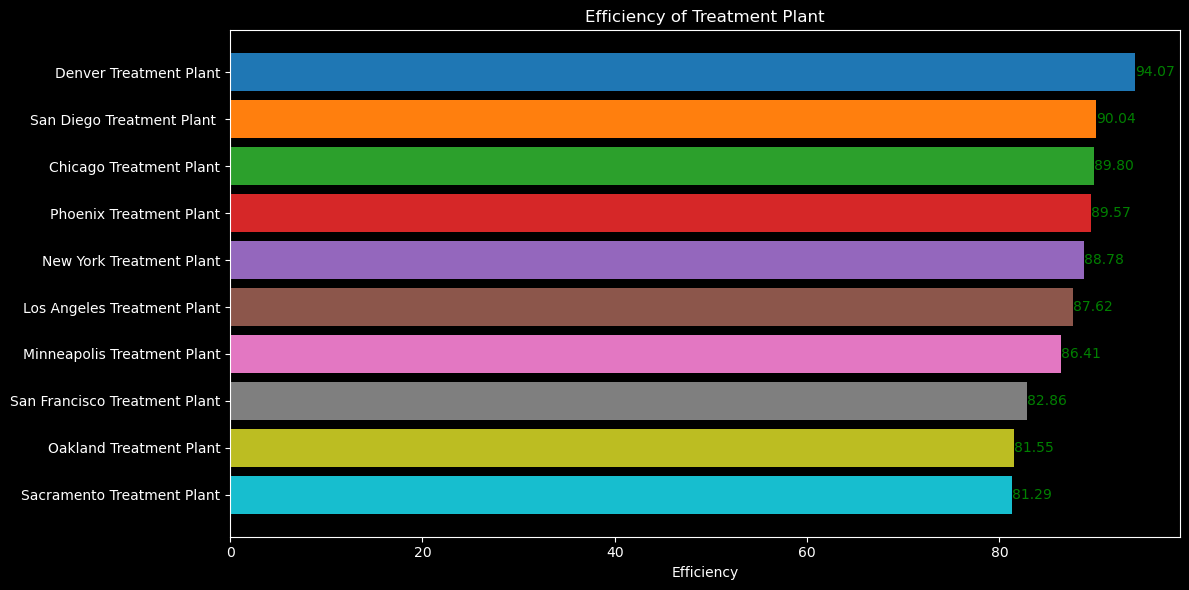

In [152]:
plt.style.use('dark_background')

sorted_data = Successfully_Treated_df.sort_values(by='Efficiency', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

# Define custom colors for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

bars = plt.barh(sorted_data['name'], sorted_data['Efficiency'], color=custom_colors)
plt.xlabel('Efficiency')
plt.title('Efficiency of Treatment Plant')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', ha='left', va='center', color='green')

plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top
plt.tight_layout()

plt.show()

# KPI 5 : Identify Day Wise Activity of Treatment Plant

In [171]:
# KPI 5 : Identify Day Wise Activity of Treatment Plant
Weekday_wise_Activity_df=WstWtrtrt_TrtPlant_df.groupby(['name','Weekday'],as_index=False)['Volume of Water Treated'].sum()

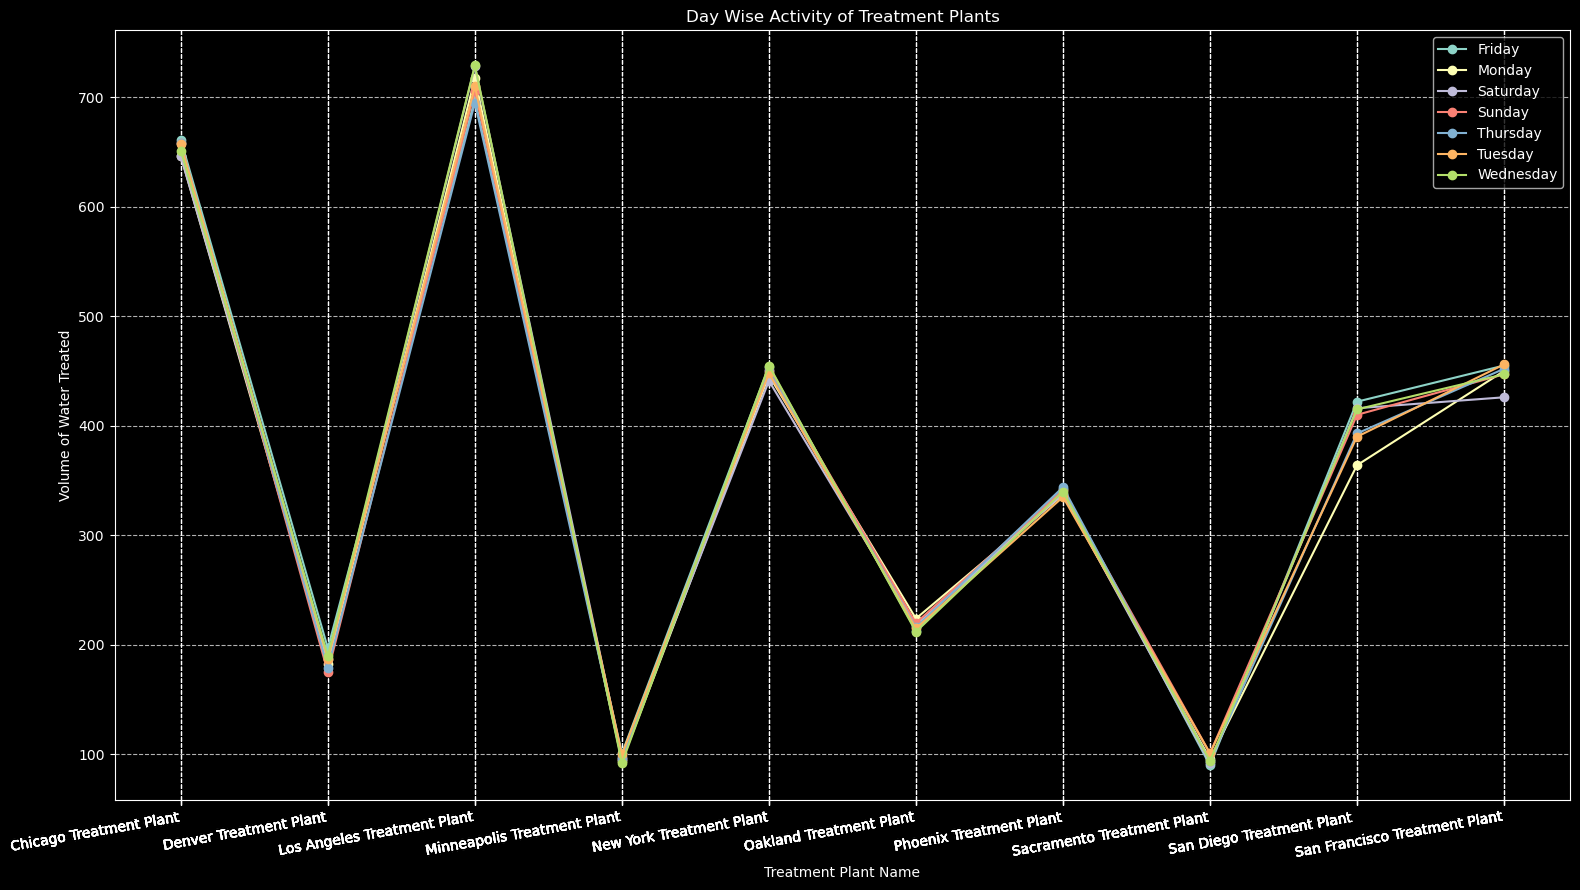

In [172]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(16, 9))

unique_weekdays = Weekday_wise_Activity_df['Weekday'].unique()

for weekday in unique_weekdays:
    weekday_data = Weekday_wise_Activity_df[Weekday_wise_Activity_df['Weekday'] == weekday]
    ax.plot(weekday_data['name'], weekday_data['Volume of Water Treated'], marker='o', label=weekday)

ax.set_xlabel('Treatment Plant Name')
ax.set_ylabel('Volume of Water Treated')
ax.set_title('Day Wise Activity of Treatment Plants')
ax.set_xticks(Weekday_wise_Activity_df['name'])
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=10, ha='right')
plt.tight_layout()

plt.show()